# Capstone Project

## Background

We are glad you have successfully reached the capstone project part of "Data Science Fundamentals" course. You will put everything 
you have learned so far about data science to work. The outcome of this module should potentially serve as your portfolio item.

Unlike with previous projects, this time you are free to choose a dataset to explore from two suggested ones. As you will have to solve a provided problem using one or another dataset, there will not be list of predefined questions that you have to answer - be creative and explore any dimensions of data you deem worth analyzing.

Although this might seem scary, this is how data science looks like in the industry. Often, it's your responsibility to not only give answers using the data, but also raise questions. The more creatively you look at this project, the better. Good luck!

----

## Requirements

Whichever problem you choose to analyze, general requirements are as follow:

#### Exploratory Data Analysis
* Describe the data with basic statistical parameters - mean, median, quantiles, etc. Use parameters that give you the most important statistical insights of the data.
* Grouping the data and analyzing the groups - using Pandas aggregate methods.
* Work with features - handle missing data if needed, use pandas date APIs.
* Manipulate datasets - use joins in needed.
* Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.

#### Statistical hypothesis testing
* Use at least one statistical significance test.
* Report p-values.
* Use visualizations.

#### Modeling
* Visualize data with dimensionality reduction algorithms.
* Perform cluster analysis.
* Use a linear model to explain relationships by correlation and predict new values.

#### Presentation
* Present the project - the data, methods and results.

## Problems

#### COVID-19 crisis 

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1574515944794-d6dedc7150de?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1532&q=80" /></div>

The world is still struggling with one the most rapidly spreading pandemics. There are a lot of people who say that data is the best weapon we can use in this "Corona Fight". 

Imagine that you are one of the best data scientists in your country. The president of your country asked you to analyze the COVID-19 patient-level data of South Korea and prepare your homeland for the next wave of the pandemic. You, as the lead data scientist of your country **have to create and prove a plan of fighting the pandemics in your country** by analyzing the provided data. You must get most important insights using learned data science techniques and present them to the lead of your country.

https://www.kaggle.com/kimjihoo/coronavirusdataset/

#### 2016 US presidential elections

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1583340806569-6da3d5ea9911?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1315&q=80" /></div>

In 2016, Donald Trump lost the popular vote, yet he won the electoral vote, securing 4 years in the Oval Office. This has been a shock to democrat supporters all around the world.

Imagine you travel back in time to 2016. As soon as you step out of your time-capsule, the Democratic Party hires you. They want you, the best data scientist across the time and space, **to explain what happened and what should have been done differently**. They want you to **prepare them for 2020 presidential elections**.

The Party has some tips for you - inspect the voters. What are Trump supporters? What do they feature? What are our supporters? Where should focus next? Any pro-trump states? Cities?

The Democrats were kind of enough to share [a Kaggle dataset](https://www.kaggle.com/benhamner/2016-us-election) with you on 2016 U.S. elections. Use the data to help the Democrats.

#### Fatal Police Shooting in United States

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1606352466047-7cef02b312bb?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1662&q=80" /></div>

[Police brutality in the United States](https://en.wikipedia.org/wiki/Police_brutality_in_the_United_States) has been an nationwide issue since the 20th century. Public safety of U.S. citizens is a typical argument to justify the controversially high number of fatal shootings.

You are a contractor to the United States Department of Justice. **You have been given a case to investigate fatal police shootings throughout the United States of America, provide a list of issues, and propose a plan on how to tackle these issues**.

The department offered some tips - the public opinion indicates that there's something systematically fishy of police actions against civilians, some states differ from other, some cities are different from others, race equality is still an unanswered question, there's some talk about huge spendings on police, rumors about mental issues of those getting shot. Government is all about prioritizing - use the data to list issues with the police activity and propose a plan which issues to tackle first and how.

Your are given 1 dataset to start with. Try to search for more datasets to enrich your data analysis.

Here's the dataset:

* [Fatal Police Shootings in the U.S. '15 - '17](https://www.kaggle.com/washingtonpost/police-shootings).

## Evaluation Criteria

- Code quality
- Fulfillment of the idea
- Adherence to the requirements
- Delivery of the presentation

#### Statistical hypothesis testing
- Correct statistical test method is used, based on the situation.
- Reasoning on chosen statistical significance level.

#### Modeling
- Both PCA and T-SNE algorithms are used.

## Corona crisis

lalala

### Getting started

In [2]:
# imports
import pandas as pd
import numpy as np
import scipy.stats

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans

In [3]:
# Load data
case = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/Case.csv?token=AFU2SI6VUUPBE5YQYZMOLXC72HE3S")
patient = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/PatientInfo.csv?token=AFU2SI3MJJRN7U6ASU47T4C72HE2G")
policy = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/Policy.csv?token=AFU2SIY2DTJJUOJKVJ6FRHK72HGLI")
region = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/Region.csv?token=AFU2SIYZDGW7DBUX7RYONTS72HGJU")
search_trend = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/SearchTrend.csv?token=AFU2SI6XXFGO6I7ZNW6SAUK72HGHU")
# seoul = pd.read_csv("https://github.com/TuringCollegeSubmissions/lcramw-DS.1.4/blob/master/SeoulFloating.csv.zip?raw=true")
time = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/Time.csv?token=AFU2SI3BAPSZX6HQDT4SZZ272HGFS")
time_age = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/TimeAge.csv?token=AFU2SI7BED77ELOCPDVT2YC72HGEU")
time_gender = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/TimeGender.csv?token=AFU2SIZMN7GXCQHJ5IHQIMK72HGC2")
time_province = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/TimeProvince.csv?token=AFU2SI2GS5CZLMYM2GSQP3272HGBS")
weather = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/Weather.csv?token=AFU2SI7TOYZRPM5GX6JMVOC72HGAU")



In [3]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-22-2020.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/08-22-2020.csv')

### EDA

In [4]:
print("first Infected date in korea: ", patient['confirmed_date'][0])

first Infected date in korea:  2020-01-23


In [5]:
patient.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [95]:
patient.shape

(5165, 14)

In [97]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB


In [98]:
region.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [124]:
region.shape

(244, 12)

In [4]:
full_features_df = patient.merge(region, how='left', on=['province', 'city'])

In [5]:
full_features_df.drop(columns=['age', 'sex' ,'patient_id', 'contact_number', 'infected_by', 'infection_case', 'latitude', 'longitude', 'code', 'deceased_date', 'symptom_onset_date', 'released_date'], inplace=True)

In [6]:
full_features_df.head()

,country,province,city,confirmed_date,state,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,Korea,Seoul,Gangseo-gu,2020-01-23,released,36.0,56.0,1.0,1.17,14.39,5.7,1080.0
1,Korea,Seoul,Jungnang-gu,2020-01-30,released,23.0,31.0,1.0,0.70,16.65,6.9,689.0
2,Korea,Seoul,Jongno-gu,2020-01-30,released,13.0,17.0,3.0,1.71,18.27,6.8,668.0
3,Korea,Seoul,Mapo-gu,2020-01-30,released,22.0,24.0,2.0,1.83,14.05,4.9,929.0
4,Korea,Seoul,Seongbuk-gu,2020-01-31,released,29.0,49.0,6.0,1.02,16.15,6.0,729.0


In [128]:
full_features_df.shape

(5165, 12)

In [20]:
full_features_df.isnull().sum()

country                       0
province                      0
city                         94
confirmed_date                3
state                         0
elementary_school_count     219
kindergarten_count          219
university_count            219
academy_ratio               219
elderly_population_ratio    219
elderly_alone_ratio         219
nursing_home_count          219
dtype: int64

In [21]:
full_features_df.dropna(subset=['elementary_school_count', 'kindergarten_count', 'university_count', 'academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio', 'nursing_home_count'], inplace=True)

In [22]:
full_features_df.isnull().sum()

country                     0
province                    0
city                        0
confirmed_date              3
state                       0
elementary_school_count     0
kindergarten_count          0
university_count            0
academy_ratio               0
elderly_population_ratio    0
elderly_alone_ratio         0
nursing_home_count          0
dtype: int64

In [23]:
full_features_df.state.value_counts()

released    2835
isolated    2056
deceased      55
Name: state, dtype: int64

In [24]:
full_features_df.country.unique()

array(['Korea', 'China', 'United States', 'France', 'Thailand', 'Canada',
       'India', 'Switzerland', 'Germany', 'Vietnam', 'Foreign',
       'Indonesia', 'Mongolia', 'United Kingdom', 'Spain', 'Bangladesh'],
      dtype=object)

In [6]:
search_trend.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


In [7]:
search_trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1642 non-null   object 
 1   cold         1642 non-null   float64
 2   flu          1642 non-null   float64
 3   pneumonia    1642 non-null   float64
 4   coronavirus  1642 non-null   float64
dtypes: float64(4), object(1)
memory usage: 64.3+ KB


In [80]:
search_trend.set_index('date', inplace=True)

In [9]:
search_trend.describe()

,cold,flu,pneumonia,coronavirus
count,1642.000000,1642.000000,1642.000000,1642.000000
mean,0.190506,0.244946,0.221430,1.862522
std,0.459556,0.762229,0.463014,9.042341
min,0.051630,0.009810,0.068810,0.001540
25%,0.106630,0.042105,0.128630,0.006270
50%,0.133170,0.097855,0.164445,0.008900
75%,0.165900,0.250035,0.209765,0.013158
max,15.720710,27.327270,11.393200,100.000000


In [10]:
# Set as day for the plot
search_trend = search_trend.asfreq('D', method='pad')

In [ ]:
# Plot search_trend
plt.figure(figsize=(22,10))
plt.plot(search_trend)

# Set axis settings and labels
plt.ylabel('Relative search volume');
plt.xlabel('Date');
plt.title('Relative keyword searches in NAVER South-Korea')
plt.xlim((pd.to_datetime("2019-01-01"),pd.to_datetime("2020-07-01")))


# show a legend on the plot
plt.legend(labels=['cold', 'flu', 'pneumonia', 'coronavirus'])

In [12]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [13]:
time.drop(columns=['time'], inplace=True)

In [89]:
time_age.head(10)

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
5,2020-03-02,0,50s,834,5
6,2020-03-02,0,60s,530,6
7,2020-03-02,0,70s,192,6
8,2020-03-02,0,80s,81,3
9,2020-03-03,0,0s,34,0


In [90]:
time_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       1089 non-null   object
 1   time       1089 non-null   int64 
 2   age        1089 non-null   object
 3   confirmed  1089 non-null   int64 
 4   deceased   1089 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 42.7+ KB


In [91]:
time_age.age.unique()

array(['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s'],
      dtype=object)

In [92]:
time_age['age'] = time_age['age'].str.replace('s', '')

In [93]:
time_age['age'] = time_age['age'].astype(int)

In [94]:
list_columns = time_age.age.unique()

In [75]:
# Voor deze age als object laten!
# new_age = time_age.pivot(index='date', columns='age', values=['confirmed', 'deceased'])
# new_age.head()

confirmed                             ... deceased                    
age               0s  10s   20s  30s  40s   50s  ...      30s 40s 50s 60s 70s 80s
date                                             ...                             
2020-03-02        32  169  1235  506  633   834  ...        1   1   5   6   6   3
2020-03-03        34  204  1417  578  713   952  ...        1   1   5   7   9   5
2020-03-04        34  233  1575  631  790  1051  ...        1   1   5   7  12   6
2020-03-05        38  257  1727  659  847  1127  ...        1   1   5   8  13   7
2020-03-06        45  292  1877  693  889  1217  ...        1   1   5  11  14  10

[5 rows x 18 columns]

In [76]:
# new_age.columns = list(map("_".join, new_age.columns))
# new_age.head()

,confirmed_0s,confirmed_10s,confirmed_20s,confirmed_30s,confirmed_40s,confirmed_50s,confirmed_60s,confirmed_70s,confirmed_80s,deceased_0s,deceased_10s,deceased_20s,deceased_30s,deceased_40s,deceased_50s,deceased_60s,deceased_70s,deceased_80s
date,,,,,,,,,,,,,,,,,,
2020-03-02,32,169,1235,506,633,834,530,192,81,0,0,0,1,1,5,6,6,3
2020-03-03,34,204,1417,578,713,952,597,224,93,0,0,0,1,1,5,7,9,5
2020-03-04,34,233,1575,631,790,1051,646,260,108,0,0,0,1,1,5,7,12,6
2020-03-05,38,257,1727,659,847,1127,699,288,124,0,0,0,1,1,5,8,13,7
2020-03-06,45,292,1877,693,889,1217,763,340,168,0,0,0,1,1,5,11,14,10


In [55]:
# time_age.set_index('date', inplace=True)

In [87]:
# new_age.join(search_trend, on='date')

,confirmed_0s,confirmed_10s,confirmed_20s,confirmed_30s,confirmed_40s,confirmed_50s,confirmed_60s,confirmed_70s,confirmed_80s,deceased_0s,deceased_10s,deceased_20s,deceased_30s,deceased_40s,deceased_50s,deceased_60s,deceased_70s,deceased_80s,cold,flu,pneumonia,coronavirus
date,,,,,,,,,,,,,,,,,,,,,,
2020-03-02,32,169,1235,506,633,834,530,192,81,0,0,0,1,1,5,6,6,3,0.88160,0.13345,0.44080,60.86853
2020-03-03,34,204,1417,578,713,952,597,224,93,0,0,0,1,1,5,7,9,5,0.67934,0.11917,0.39853,47.17367
2020-03-04,34,233,1575,631,790,1051,646,260,108,0,0,0,1,1,5,7,12,6,0.82579,0.10790,0.35671,39.84053
2020-03-05,38,257,1727,659,847,1127,699,288,124,0,0,0,1,1,5,8,13,7,0.64916,0.09745,0.31726,33.24218
2020-03-06,45,292,1877,693,889,1217,763,340,168,0,0,0,1,1,5,11,14,10,0.58625,0.09163,0.28071,29.61647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,184,698,3317,1463,1651,2264,1633,839,553,0,0,0,2,3,15,41,82,139,0.11381,0.03027,0.11317,2.15139
2020-06-27,185,700,3331,1473,1657,2269,1640,843,555,0,0,0,2,3,15,41,82,139,0.10554,0.02136,0.08354,1.96848
2020-06-28,187,703,3343,1485,1667,2275,1653,846,556,0,0,0,2,3,15,41,82,139,0.12563,0.02872,0.08072,2.19720


In [29]:
time_gender.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [14]:
time.describe().round(2)

,test,negative,confirmed,released,deceased
count,163.00,163.00,163.00,163.00,163.00
mean,497779.72,475483.90,7834.87,5604.31,157.10
std,395883.02,386561.12,4666.04,4544.32,114.01
min,1.00,0.00,1.00,0.00,0.00
25%,96488.00,58774.00,3443.00,29.00,17.50
50%,503051.00,477303.00,10450.00,7117.00,208.00
75%,782558.50,754222.50,11116.00,10100.50,263.50
max,1273766.00,1240157.00,12800.00,11537.00,282.00


In [15]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       163 non-null    object
 1   test       163 non-null    int64 
 2   negative   163 non-null    int64 
 3   confirmed  163 non-null    int64 
 4   released   163 non-null    int64 
 5   deceased   163 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 7.8+ KB


In [16]:
time.set_index('date', inplace=True)

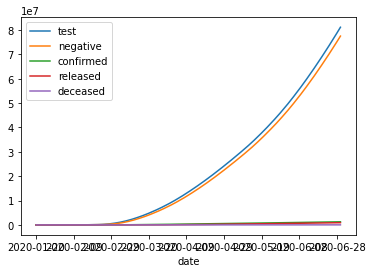

In [17]:
time.sort_index().cumsum(axis = 0, skipna=True).plot()

In [18]:
trends_and_time = pd.concat([search_trend, time[['confirmed', 'deceased']]], axis = 1, join='inner')

In [21]:
# Set as day for the plot
time = time.asfreq('D', method='pad')

In [ ]:
# Plot search_trend
plt.figure(figsize=(22,10))
plt.plot(time)

# Set axis settings and labels
plt.ylabel('volume');
plt.xlabel('Date');
plt.title('Relative keyword searches in NAVER South-Korea')
plt.xlim((pd.to_datetime("2020-01-01"),pd.to_datetime("2020-07-01")))


# show a legend on the plot
plt.legend(labels=['test', 'negative', 'confirmed', 'released', 'deceased'])

Wat wil ik doen?

predicten van deaths/cases of iets per search term?

cluster per wat?



In [23]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


In [24]:
case.shape

(174, 8)

In [25]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1520,1525,1531,1534,1535,1538,1538,1544,1547,1551,1557,1557,1559,1565,1577,1580,1584,1594,1598,1608,1620,1635,1641,1648,1653,1666,1678,1690,1702,1715,1728,1737,1740,1752,1774,1795,1822,1841,1846,1846
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,480,487,493,499,502,509,518,527,532,536,543,549,557,559,571,579,590,598,605,612,623,631,637,646,657,672,685,699,716,735,743,753,771,787,798,810,822,839,852,870
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1922,1931,1941,1949,1956,1964,1973,1980,1980,1999,2011,2024,2036,2048,2062,2077,2093,2111,2124,2139,2154,2168,2186,2206,2224,2236,2255,2272,2294,2309,2329,2352,2372,2393,2410,2431,2447,2464,2480,2492
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,72,72,72,73,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,77,77
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,270,271,275,275,279,284,286,289,291,296,299,300,303,307,308,308,312,315,317,322,322,324,328,332,333,334,336,337,337,338,340,341,342,345,346,348,350,351,352,353


In [26]:
deaths_df.dropna(subset=['Lat', "Long"], inplace=True)

In [27]:
column_list = list(deaths_df)
column_list.remove("Lat")
column_list.remove("Long")
column_list.remove("Country/Region")
column_list.remove('Province/State')

In [28]:
deaths_df["Sum"] = deaths_df[column_list].sum(axis=1)

### Modeling

#### PCA

In [25]:
# Leave out state
features = ['elementary_school_count', 'kindergarten_count', 'university_count',
       'academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio',
       'nursing_home_count']
       
# Separating out the features
x = full_features_df.loc[:, features].values

# Separating out the target
y = full_features_df.loc[:,['state']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [28]:
# Visualise the standardised data (Just for simplicity)
see_x = pd.DataFrame(data=x, columns=features)
see_x.head()

,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,-0.126653,-0.197632,-0.717307,-0.511312,-0.272721,-0.353517,0.484077
1,-0.685040,-0.767916,-0.717307,-1.328139,0.112026,-0.047497,-0.189123
2,-1.114569,-1.087275,-0.084223,0.427170,0.387818,-0.072999,-0.225280
3,-0.727993,-0.927596,-0.400765,0.635722,-0.330603,-0.557530,0.224094
4,-0.427323,-0.357312,0.865403,-0.772002,0.026905,-0.277012,-0.120254


In [29]:
# While applying StandardScaler, each feature of your data should be normally 
# distributed such that it will scale the distribution to a mean of zero
# and a standard deviation of one.
np.mean(x),np.std(x)

(2.626927103497569e-17, 0.9999999999999999)

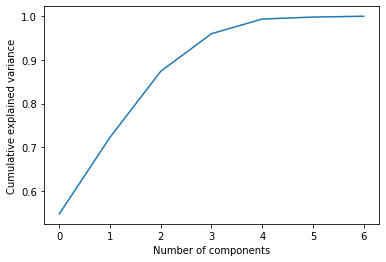

In [30]:
# Plot the explained variance per component added
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

In [31]:
# 2 PCA components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2'])

In [32]:
# Check the head()
principal_df.head()

,principal component 1,principal component 2
0,-0.036107,0.639453
1,1.282271,0.470135
2,1.012576,0.956832
3,0.074076,1.406538
4,0.427491,-0.483129


In [33]:
# Concatenate and view head()
final_df_pca = pd.concat([principal_df, full_features_df[['state']]], axis = 1)
final_df_pca.head()

,principal component 1,principal component 2,state
0,-0.036107,0.639453,released
1,1.282271,0.470135,released
2,1.012576,0.956832,released
3,0.074076,1.406538,released
4,0.427491,-0.483129,released


In [36]:
final_df_pca.shape

(5161, 3)

<Figure size 720x720 with 0 Axes>

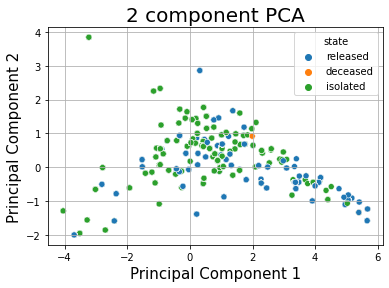

In [37]:
# Scatterplot 
fig = plt.figure(figsize = (10,10))

fig, ax = plt.subplots()

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

sns.scatterplot(x=final_df_pca['principal component 1'], y=final_df_pca['principal component 2'], hue=final_df_pca.state)
ax.grid()

In [38]:
# Explained variance of the components
pca.explained_variance_ratio_

array([0.54768667, 0.17527298])

#### T-SNE

In [154]:
# Initialise T-SNE and set 2 components
tsne = TSNE(n_components=2, random_state=0)

In [155]:
# Feed the features dataset 
tsne_obj= tsne.fit_transform(x)

In [156]:
# View the head()
tsne_df = pd.DataFrame(data = tsne_obj
             , columns = ['X', 'Y'])

tsne_df.head()

,X,Y
0,-2.901429,-7.742569
1,50.505646,57.238605
2,-4.202808,-24.671047
3,14.021624,-60.357304
4,67.914452,45.932995


In [157]:
# Concatenate and view again
final_tsne_df = pd.concat([tsne_df, full_features_df[['state']]], axis = 1)
final_tsne_df.head()

,X,Y,state
0,-2.901429,-7.742569,released
1,50.505646,57.238605,released
2,-4.202808,-24.671047,released
3,14.021624,-60.357304,released
4,67.914452,45.932995,released


<Figure size 576x576 with 0 Axes>

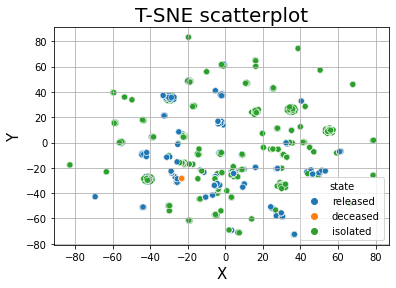

In [158]:
# T-SNE scatterplot
fig = plt.figure(figsize = (8,8))

fig, ax = plt.subplots()

ax.set_xlabel('X', fontsize = 15)
ax.set_ylabel('Y', fontsize = 15)
ax.set_title('T-SNE scatterplot', fontsize = 20)

sns.scatterplot(x="X", y="Y", hue="state", data=final_tsne_df);
ax.grid()

#### Clustering

In [ ]:
# Prepare a dataframe for Kmeans clustering
# cluster_df = model.drop(columns=['genre'])

In [70]:
# Calculate the within cluster SSE (distortion)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(principal_df) # x is standardized
    distortions.append(kmeanModel.inertia_)

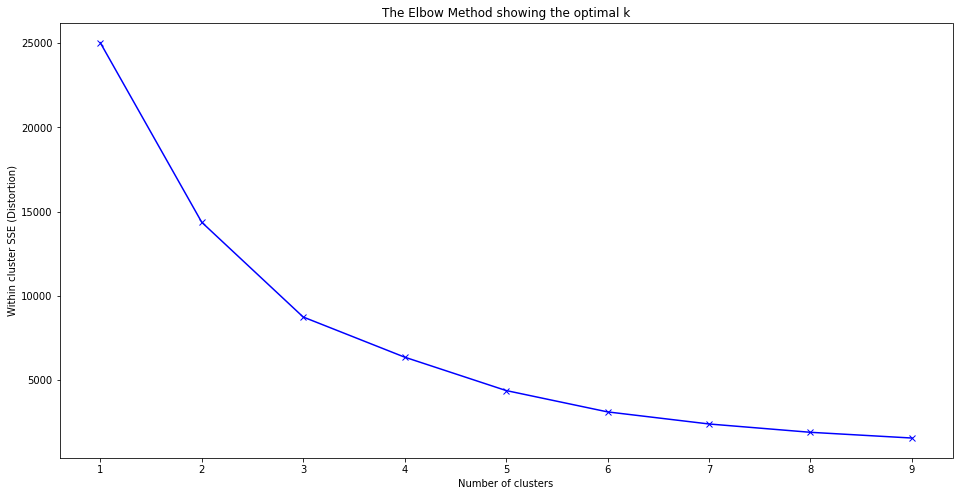

In [71]:
# Plot the elbow figure
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster SSE (Distortion)')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# Installing kneed
pip install kneed
from kneed import DataGenerator, KneeLocator

In [72]:
# Using kneed to programmatically check elbow point
kl = KneeLocator(range(1, 10), distortions, curve="convex", direction="decreasing")
kl.elbow

3

In [73]:
# Fit and predict the Kmeans model
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(principal_df)
y_kmeans = kmeanModel.predict(principal_df)

In [74]:
principal_df.shape

(4946, 2)

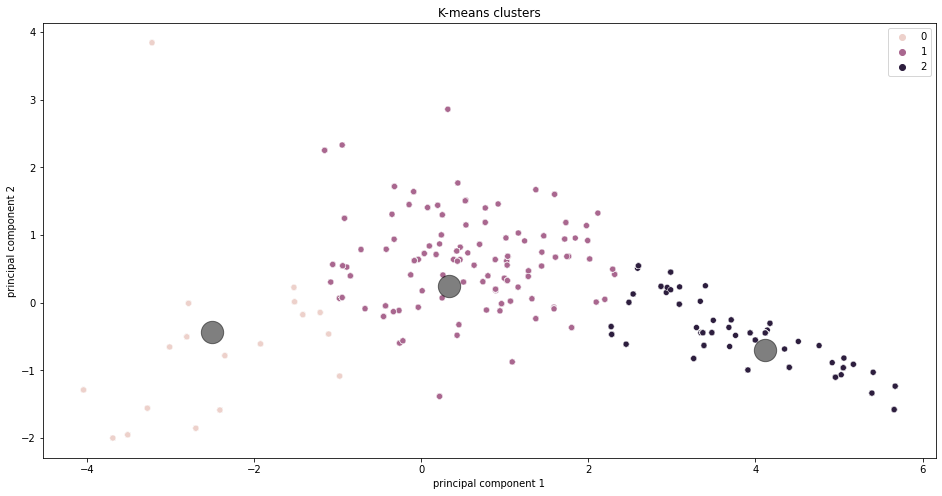

In [108]:
# plot points
plt.figure(figsize=(16,8))
plt.title('K-means clusters')

sns.scatterplot(data=principal_df, x='principal component 1', y='principal component 2', hue=y_kmeans)


# plot cluster centers
centers = kmeanModel.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5);

In [79]:
# Add column for cluster labels
full_features_df['cluster'] = kmeanModel.labels_

In [109]:
# change clusters to 1 - 3 instead of 0 - 2
full_features_df['cluster'] = full_features_df['cluster'].map({0:1, 1:2, 2:3}) 

In [87]:
# Group by cluster
grouped_by_cluster = full_features_df.groupby('cluster')

In [95]:
# Get the percentages of states in each cluster
df = pd.concat([grouped_by_cluster.state.value_counts(), 
                grouped_by_cluster.state.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))

df.round(2)

counts  percentage
cluster state                       
1       isolated     759       63.84
        released     429       36.08
        deceased       1        0.08
2       released    2102       63.77
        isolated    1156       35.07
        deceased      38        1.15
3       released     304       65.94
        isolated     141       30.59
        deceased      16        3.47

Seems like the highest percentage of deceased patients are in cluster 3, but the highest absolute number of deceased patients is in cluster 2.

In [94]:
grouped_by_cluster.mean()

,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
cluster,,,,,,,
1,73.216989,128.263246,3.880572,1.931211,12.250336,5.076451,1508.651808
2,29.818871,48.169296,3.423240,1.396942,15.183243,6.307919,637.987257
3,15.839479,18.559653,0.557484,0.740651,31.424338,17.834707,118.201735


It seems that cluster 3 has a higher percentage of `elderly_population` compared to the other 2 clusters

### Statistical testing

Parametric test assumptions

*   Independence: Meaning that each observation is independent of another; if there are 2 or more groups being compared, then it refers to that fact that groups are mutually exclusive, i.e. each individual belongs to only 1 group; and that the data is not repeated over time.
*   Population distributions are normal: The normality assumption is applied differently depending on the statistical method being used. For example, it applies to the shape of the sampling distribution for the dependent variable (outcome variable).
*   Samples have equal variances

In [ ]:
pip install researchpy

In [117]:
import researchpy as rp
rp.summary_cont(full_features_df['elderly_population_ratio'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,elderly_population_ratio,4946.0,15.992,5.8746,0.0835,15.8282,16.1557


#### linear regression

In [ ]:
# Add ca􏰇eg􏰄􏰆i􏰉ed 􏰖a􏰅􏰋e􏰉
fi􏰃a􏰅_df['ge􏰃􏰆e_ca􏰇'] = fi􏰃a􏰅_df['ge􏰃􏰆e'].a􏰉􏰇􏰂􏰁e("ca􏰇eg􏰄􏰆􏰂").ca􏰇.c􏰄de􏰉

In [ ]:
# Get x and y for linear regression from pca df
# x is the input and y is the output (predictor)
linear_x = final_df[['principal component 1']]
linear_y = final_df[['genre_cat']]

In [ ]:
# initialise the linear regression and fit the model
linear_model = LinearRegression().fit(linear_x, linear_y)

In [ ]:
# Check the values
r_sq = linear_model.score(linear_x, linear_y)
print('coefficient of determination:', r_sq)
print('intercept:', linear_model.intercept_)
print('slope:', linear_model.coef_)

In [ ]:
# Ma􏰁 􏰇he ge􏰃􏰆e􏰉􏰉
􏰊a􏰁􏰁ed_ge􏰃􏰆e􏰉 = dic􏰇( e􏰃􏰋􏰊e􏰆a􏰇e(fi􏰃a􏰅_df['ge􏰃􏰆e'].a􏰉􏰇􏰂􏰁e('ca􏰇eg􏰄􏰆􏰂').ca􏰇.ca􏰇eg􏰄􏰆ie􏰉
                                            
# Se􏰇 􏰁􏰆edic􏰇i􏰄􏰃 a􏰉 da􏰇af􏰆a􏰊e
􏰁􏰆edic􏰇ed_df = 􏰁d.Da􏰇aF􏰆a􏰊e(􏰂_􏰁􏰆ed.a􏰉􏰇􏰂􏰁e('i􏰃􏰇'), c􏰄􏰅􏰋􏰊􏰃􏰉=['􏰁􏰆edic􏰇i􏰄􏰃'])
# Add 􏰇he 􏰁􏰆edic􏰇ed ge􏰃􏰆e
􏰁􏰆edic􏰇ed_df['􏰁􏰆edic􏰇ed_ge􏰃􏰆e'] = 􏰁􏰆edic􏰇ed_df['􏰁􏰆edic􏰇i􏰄􏰃'].􏰊a􏰁(􏰊a􏰁􏰁ed_ge􏰃􏰆e􏰉)
# check 􏰇he da􏰇a 􏰁􏰆edic􏰇ed_df.head()

In [ ]:
# Check 􏰁􏰆edic􏰇i􏰄􏰃 􏰌i􏰇h ac􏰇􏰋a􏰅 ge􏰃􏰆e
􏰁􏰆edic􏰇ed_df_fi􏰃a􏰅 = 􏰁d.c􏰄􏰃ca􏰇([􏰁􏰆edic􏰇ed_df, 􏰊􏰋􏰉ic[['ge􏰃􏰆e']]], a􏰘i􏰉 = 1) 􏰁􏰆edic􏰇ed_df_fi􏰃a􏰅